In [68]:
# importing important libraries and packages
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 70, Finished, Available, Finished)

In [67]:
!pip install imbalanced-learn

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 69, Finished, Available, Finished)

In [32]:
#saving the first table in a dataframe
df1 = spark.sql("SELECT * FROM UTME_Lakehouse.dbo.nigeria_education_data_2020_to_2024")

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 34, Finished, Available, Finished)

In [33]:
df1 = df1.toPandas()
df1

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 35, Finished, Available, Finished)

,State,Application_Number,Gender,Age,Pass_Fail,Year,School_type,Score
0,Lagos,4998,Male,17,Pass,2024,Public school,275.46
1,Lagos,8425,Male,17,Pass,2024,Public school,275.40
2,Lagos,10325,Male,17,Pass,2024,Public school,212.08
3,Lagos,24227,Male,17,Pass,2024,Public school,298.54
4,Lagos,35988,Male,17,Pass,2024,Public school,294.11
...,...,...,...,...,...,...,...,...
6579995,Ebonyi,1527637,Male,29,Fail,2020,Public school,80.28
6579996,Ebonyi,1530352,Male,29,Fail,2020,Public school,69.46
6579997,Ebonyi,1531821,Male,29,Fail,2020,Public school,77.28
6579998,Ebonyi,1532685,Male,29,Fail,2020,Public school,183.48


In [34]:
#getting the shape of the first dataframe
df1.shape

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 36, Finished, Available, Finished)

(6580000, 8)

In [35]:
# quick summary statistics
df1.describe()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 37, Finished, Available, Finished)

,Application_Number,Age,Year,Score
count,6.580000e+06,6.580000e+06,6.580000e+06,6.580000e+06
mean,6.663379e+05,2.724505e+01,2.021962e+03,1.328498e+02
std,3.941948e+05,8.531389e+00,1.461798e+00,8.410899e+01
min,1.000000e+00,1.600000e+01,2.020000e+03,0.000000e+00
25%,3.290008e+05,2.000000e+01,2.021000e+03,6.313000e+01
50%,6.580005e+05,2.500000e+01,2.022000e+03,1.262300e+02
75%,9.870002e+05,3.200000e+01,2.023000e+03,1.894100e+02
max,1.540000e+06,4.700000e+01,2.024000e+03,4.000000e+02


In [36]:
# Code generated by Data Wrangler for pandas DataFrame

def clean_data(df1):
    # Rename column 'School_type' to 'School_Type'
    df1 = df1.rename(columns={'School_type': 'School_Type'})
    return df1

df1_clean = clean_data(df1.copy())
df1_clean.head()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 38, Finished, Available, Finished)

,State,Application_Number,Gender,Age,Pass_Fail,Year,School_Type,Score
0,Lagos,4998,Male,17,Pass,2024,Public school,275.46
1,Lagos,8425,Male,17,Pass,2024,Public school,275.40
2,Lagos,10325,Male,17,Pass,2024,Public school,212.08
3,Lagos,24227,Male,17,Pass,2024,Public school,298.54
4,Lagos,35988,Male,17,Pass,2024,Public school,294.11


In [37]:
df1.isna().sum()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 39, Finished, Available, Finished)

State                 0
Application_Number    0
Gender                0
Age                   0
Pass_Fail             0
Year                  0
School_type           0
Score                 0
dtype: int64

In [38]:
#saving the second table in a dataframe
df2 = spark.sql("SELECT * FROM UTME_Lakehouse.dbo.nigeria_teacher_student_ratio")
df2 = df2.toPandas()
df2

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 40, Finished, Available, Finished)

,State,Year,School_Type,Teacher_Student_Ratio
0,Lagos,2020,Public,87
1,Lagos,2020,Private,24
2,Lagos,2021,Public,23
3,Lagos,2021,Private,23
4,Lagos,2022,Public,70
...,...,...,...,...
95,Oyo,2021,Public,60
96,Oyo,2021,Private,16
97,Oyo,2022,Public,97
98,Oyo,2022,Private,48


In [39]:
#getting the shape of the second dataframe
df2.shape

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 41, Finished, Available, Finished)

(100, 4)

In [40]:
df2.describe()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 42, Finished, Available, Finished)

,Year,Teacher_Student_Ratio
count,100.000000,100.000000
mean,2022.000000,49.230000
std,1.421338,24.254898
min,2020.000000,15.000000
25%,2021.000000,32.750000
50%,2022.000000,41.500000
75%,2023.000000,70.000000
max,2024.000000,99.000000


In [41]:
df2.info()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 43, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   State                  100 non-null    object
 1   Year                   100 non-null    int64 
 2   School_Type            100 non-null    object
 3   Teacher_Student_Ratio  100 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


In [42]:
df2.isna().sum()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 44, Finished, Available, Finished)

State                    0
Year                     0
School_Type              0
Teacher_Student_Ratio    0
dtype: int64

In [43]:
#saving the third table in a dataframe
df3 = spark.sql("SELECT * FROM UTME_Lakehouse.dbo.budgetedu")
df3 = df3.toPandas()
df3

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 45, Finished, Available, Finished)

,Year,EducationBudget,PercentageOfTotalBudget,FederalMinistryOfEducation,UBEC,TETFunds
0,2021,771500000000,0.057,0,0,0
1,2020,686800000000,0.065,0,0,0
2,2024,2180000000000,0.079,1230000000000,251470000000,700000000000
3,2023,2050000000000,0.100,1230000000000,0,0
4,2022,1290000000000,0.054,875930000000,108100000000,306000000000


In [44]:
df3.info()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 46, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        5 non-null      int64  
 1   EducationBudget             5 non-null      int64  
 2   PercentageOfTotalBudget     5 non-null      float64
 3   FederalMinistryOfEducation  5 non-null      int64  
 4   UBEC                        5 non-null      int64  
 5   TETFunds                    5 non-null      int64  
dtypes: float64(1), int64(5)
memory usage: 372.0 bytes


In [45]:
df3.describe()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 47, Finished, Available, Finished)

,Year,EducationBudget,PercentageOfTotalBudget,FederalMinistryOfEducation,UBEC,TETFunds
count,5.000000,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000e+00
mean,2022.000000,1.395660e+12,0.071000,6.671860e+11,7.191400e+10,2.012000e+11
std,1.581139,6.975981e+11,0.018881,6.259728e+11,1.107527e+11,3.087186e+11
min,2020.000000,6.868000e+11,0.054000,0.000000e+00,0.000000e+00,0.000000e+00
25%,2021.000000,7.715000e+11,0.057000,0.000000e+00,0.000000e+00,0.000000e+00
50%,2022.000000,1.290000e+12,0.065000,8.759300e+11,0.000000e+00,0.000000e+00
75%,2023.000000,2.050000e+12,0.079000,1.230000e+12,1.081000e+11,3.060000e+11
max,2024.000000,2.180000e+12,0.100000,1.230000e+12,2.514700e+11,7.000000e+11


In [46]:
df3.isna().sum()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 48, Finished, Available, Finished)

Year                          0
EducationBudget               0
PercentageOfTotalBudget       0
FederalMinistryOfEducation    0
UBEC                          0
TETFunds                      0
dtype: int64

In [47]:
# Performing a left join on the first table with the third table
df_merged = pd.merge(df1, df3, how='left', on='Year')

print(df_merged.head())


StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 49, Finished, Available, Finished)

   State  Application_Number Gender  Age Pass_Fail  Year    School_type  \
0  Lagos                4998   Male   17      Pass  2024  Public school   
1  Lagos                8425   Male   17      Pass  2024  Public school   
2  Lagos               10325   Male   17      Pass  2024  Public school   
3  Lagos               24227   Male   17      Pass  2024  Public school   
4  Lagos               35988   Male   17      Pass  2024  Public school   

    Score  EducationBudget  PercentageOfTotalBudget  \
0  275.46    2180000000000                    0.079   
1  275.40    2180000000000                    0.079   
2  212.08    2180000000000                    0.079   
3  298.54    2180000000000                    0.079   
4  294.11    2180000000000                    0.079   

   FederalMinistryOfEducation          UBEC      TETFunds  
0               1230000000000  251470000000  700000000000  
1               1230000000000  251470000000  700000000000  
2               1230000000000  2514700

In [48]:
df_merged.info()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 50, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6580000 entries, 0 to 6579999
Data columns (total 13 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   State                       object 
 1   Application_Number          int64  
 2   Gender                      object 
 3   Age                         int64  
 4   Pass_Fail                   object 
 5   Year                        int64  
 6   School_type                 object 
 7   Score                       float64
 8   EducationBudget             int64  
 9   PercentageOfTotalBudget     float64
 10  FederalMinistryOfEducation  int64  
 11  UBEC                        int64  
 12  TETFunds                    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 652.6+ MB


In [49]:
df_merged.isna().sum()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 51, Finished, Available, Finished)

State                         0
Application_Number            0
Gender                        0
Age                           0
Pass_Fail                     0
Year                          0
School_type                   0
Score                         0
EducationBudget               0
PercentageOfTotalBudget       0
FederalMinistryOfEducation    0
UBEC                          0
TETFunds                      0
dtype: int64

In [50]:
df_merged.drop(columns=['Score'], inplace=True)

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 52, Finished, Available, Finished)

In [51]:
df_merged.head()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 53, Finished, Available, Finished)

,State,Application_Number,Gender,Age,Pass_Fail,Year,School_type,EducationBudget,PercentageOfTotalBudget,FederalMinistryOfEducation,UBEC,TETFunds
0,Lagos,4998,Male,17,Pass,2024,Public school,2180000000000,0.079,1230000000000,251470000000,700000000000
1,Lagos,8425,Male,17,Pass,2024,Public school,2180000000000,0.079,1230000000000,251470000000,700000000000
2,Lagos,10325,Male,17,Pass,2024,Public school,2180000000000,0.079,1230000000000,251470000000,700000000000
3,Lagos,24227,Male,17,Pass,2024,Public school,2180000000000,0.079,1230000000000,251470000000,700000000000
4,Lagos,35988,Male,17,Pass,2024,Public school,2180000000000,0.079,1230000000000,251470000000,700000000000


## Feature Engineering

In [52]:
# Encoding the categorical columns: 'State', 'Gender', 'School_type'
categorical_columns = ['State', 'Gender', 'School_type']

# Applying Label Encoding to categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_merged[col] = le.fit_transform(df_merged[col])
    label_encoders[col] = le

# Encoding the target variable
target_encoder = LabelEncoder()
df_merged['Pass_Fail'] = target_encoder.fit_transform(df_merged['Pass_Fail'])


StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 54, Finished, Available, Finished)

# Exploratory Data Analysis

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 55, Finished, Available, Finished)

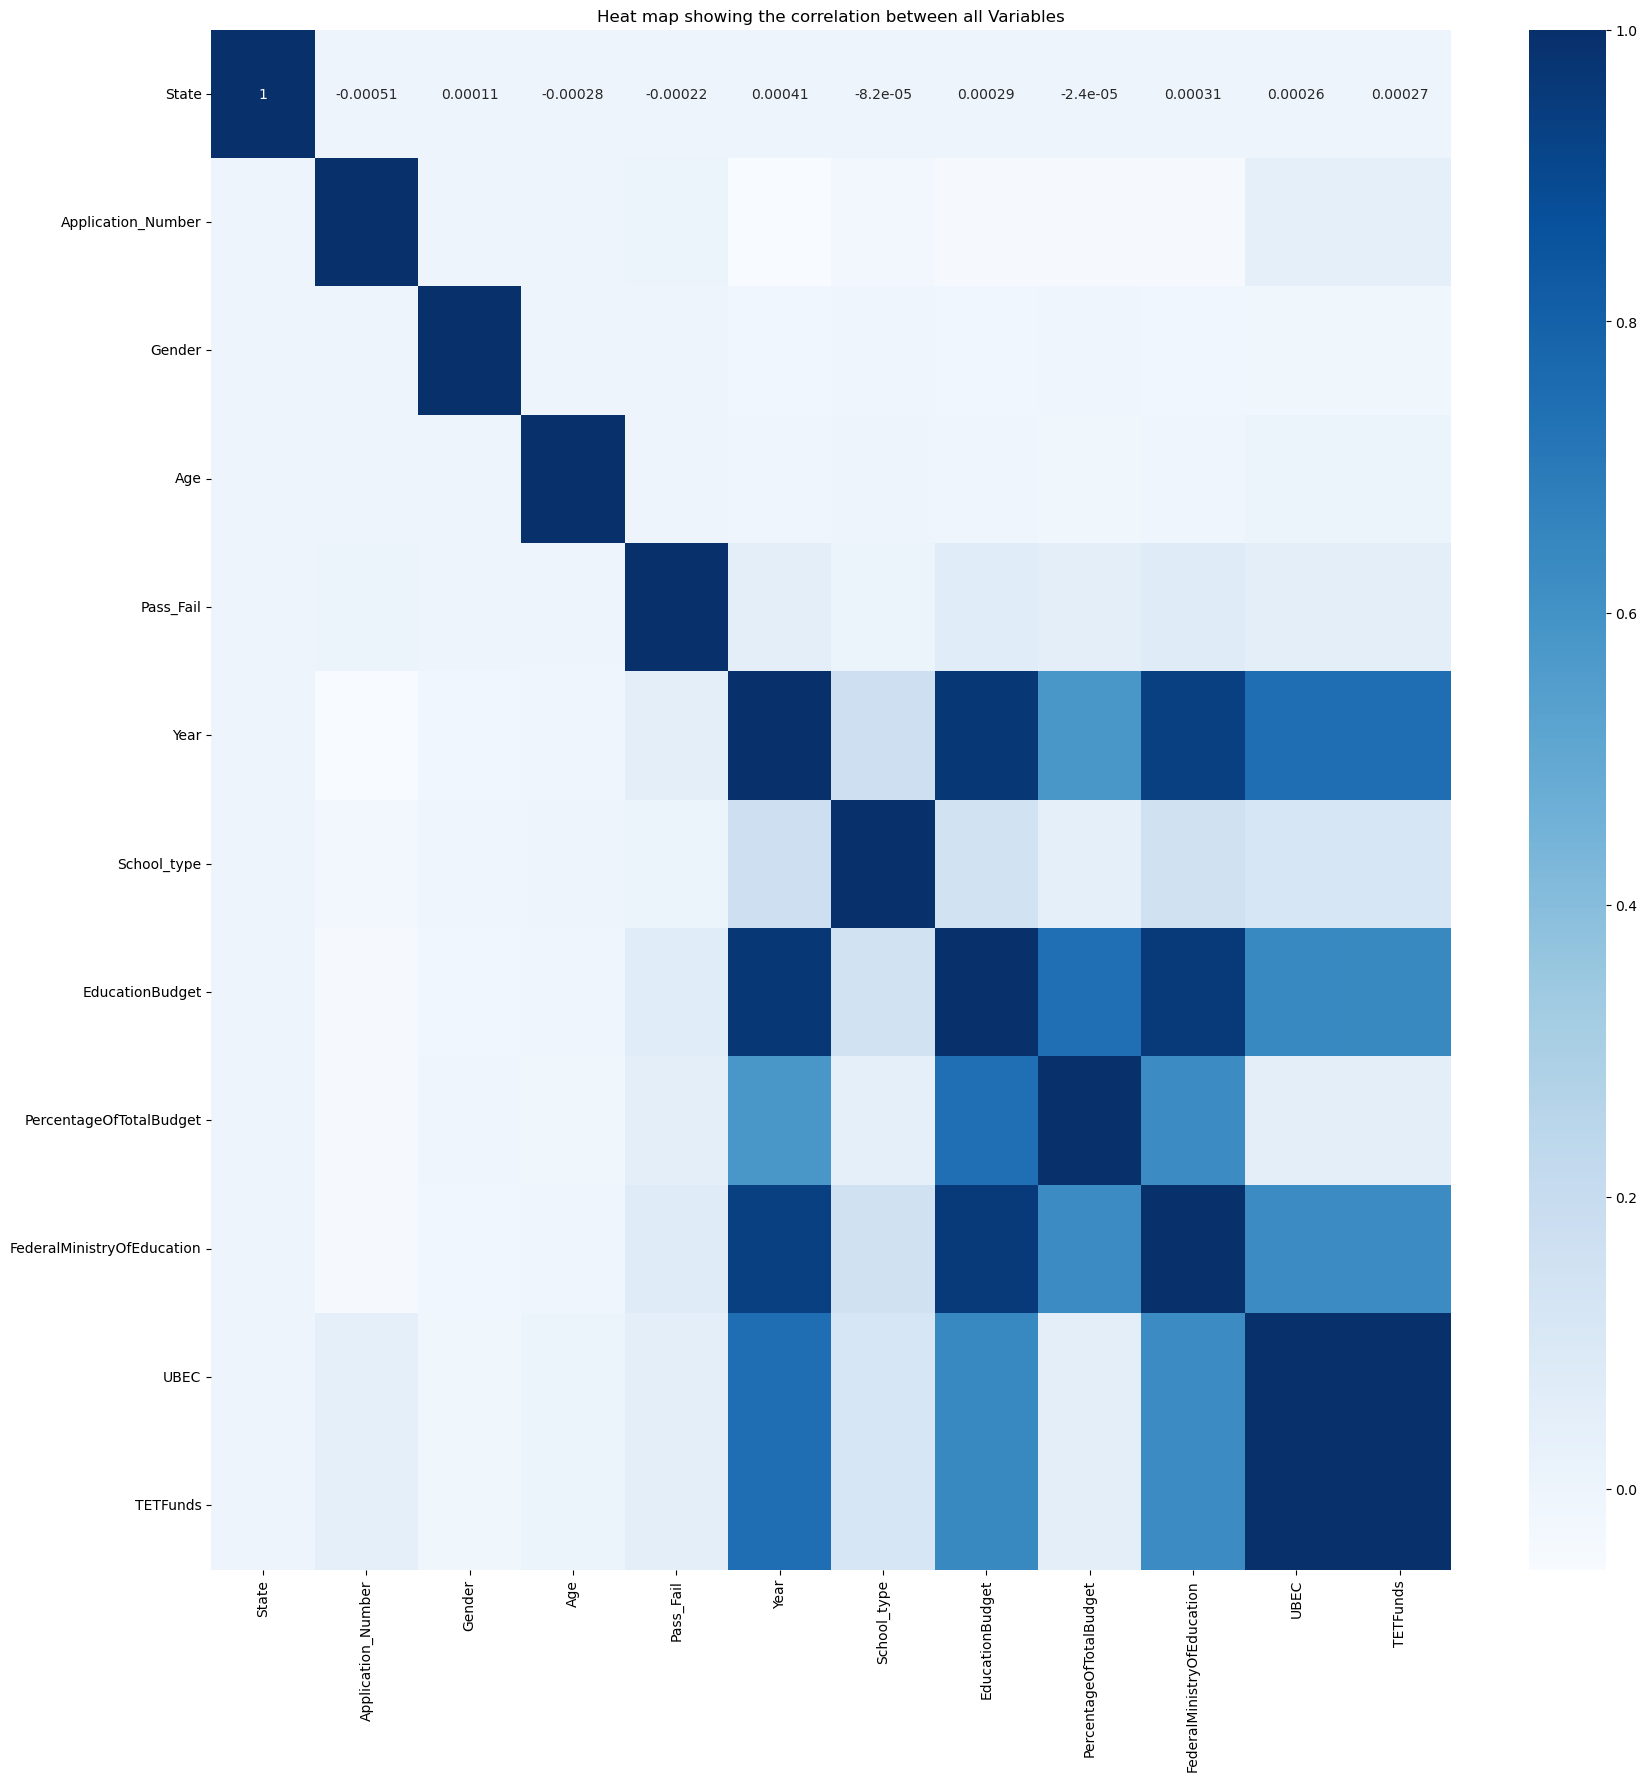

In [53]:
#seaborn plot of the heatmap set to colour blue
plt.figure(figsize=(20,20))
sns.heatmap(df_merged.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heat map showing the correlation between all Variables');

In [54]:
#correlation analysis against the target variable
df_merged.corr()['Pass_Fail'].sort_values(ascending=False)

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 56, Finished, Available, Finished)

Pass_Fail                     1.000000
FederalMinistryOfEducation    0.070704
EducationBudget               0.064476
Year                          0.053108
PercentageOfTotalBudget       0.049466
TETFunds                      0.048308
UBEC                          0.048238
Application_Number            0.007907
School_type                   0.003142
State                        -0.000220
Gender                       -0.000432
Age                          -0.000980
Name: Pass_Fail, dtype: float64

The strongest correlation value is from the Score feature with 0.762235

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 57, Finished, Available, Finished)

Text(0.5, 1.0, 'Age Distribution')

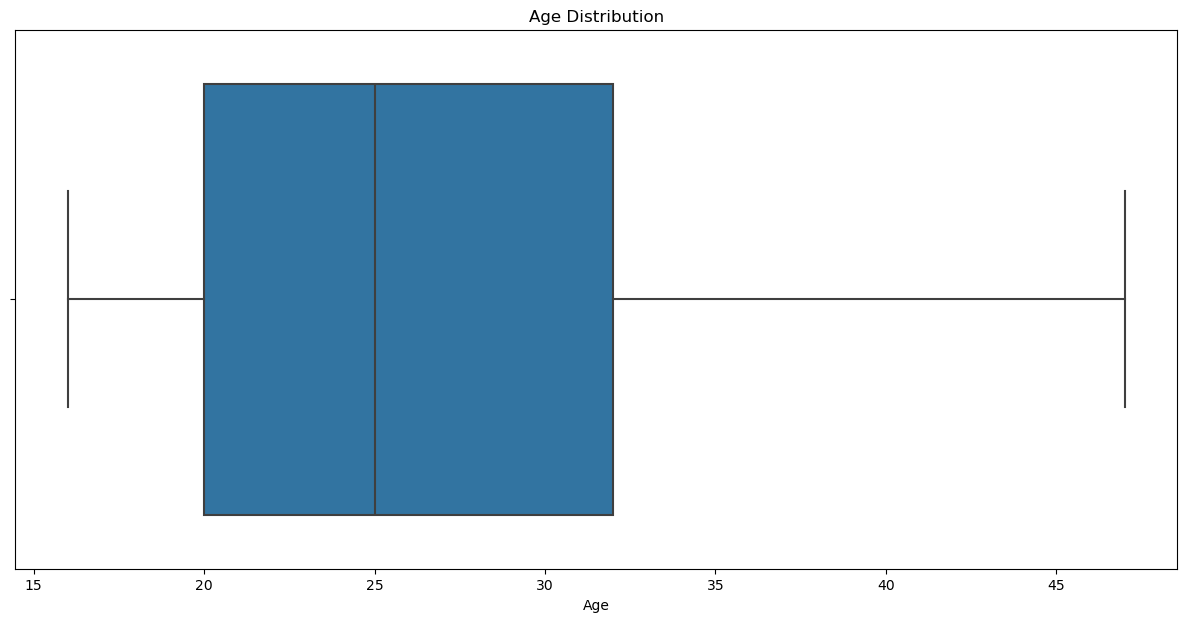

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(data = df_merged, x = 'Age')
plt.title("Age Distribution")

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 58, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


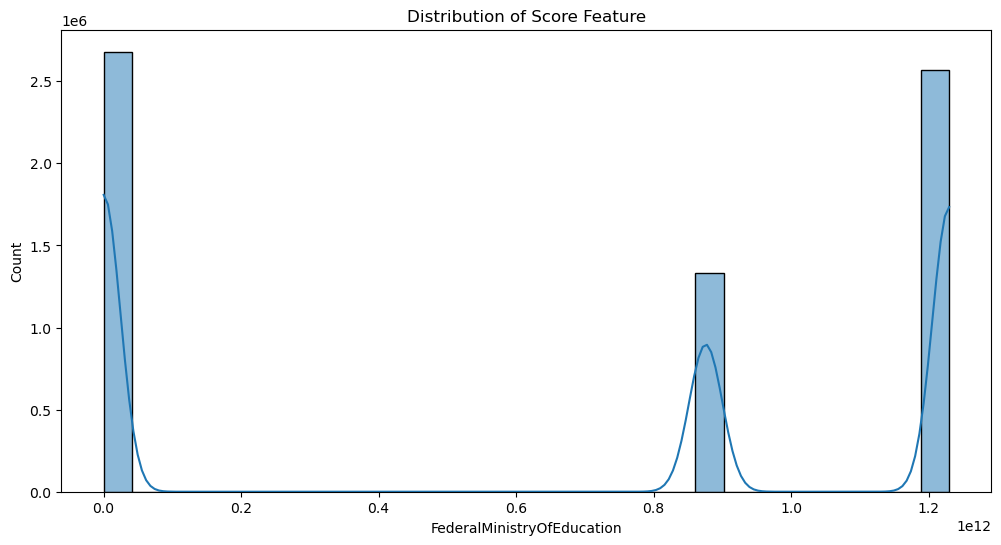

In [56]:
plt.figure(figsize=(12, 6))
sns.histplot(df_merged['FederalMinistryOfEducation'], bins=30, kde=True)
plt.title('Distribution of Score Feature');

The score feature is right-skewed so I would apply a log transformation to help the algorithm learn better.

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 59, Finished, Available, Finished)

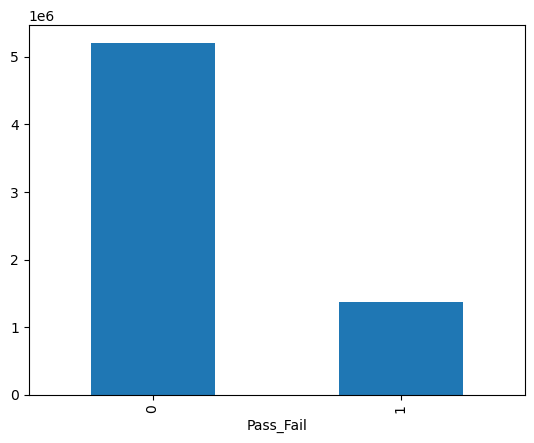

In [57]:
df_merged["Pass_Fail"].value_counts().plot(kind='bar');

# Data Cleaning

- Merged data appears to be mostly clean.
- No missing values, nulls or duplicated rows.
- Categorical data has been converted into numerical variables using one-hot encoder.
- The is no need for normalization or standardization as distribution appears normal.

# Model Building

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 61, Finished, Available, Finished)

In [60]:
df_merged.head()

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 62, Finished, Available, Finished)

,State,Application_Number,Gender,Age,Pass_Fail,Year,School_type,EducationBudget,PercentageOfTotalBudget,FederalMinistryOfEducation,UBEC,TETFunds
0,24,4998,1,17,1,2024,1,2180000000000,0.079,1230000000000,251470000000,700000000000
1,24,8425,1,17,1,2024,1,2180000000000,0.079,1230000000000,251470000000,700000000000
2,24,10325,1,17,1,2024,1,2180000000000,0.079,1230000000000,251470000000,700000000000
3,24,24227,1,17,1,2024,1,2180000000000,0.079,1230000000000,251470000000,700000000000
4,24,35988,1,17,1,2024,1,2180000000000,0.079,1230000000000,251470000000,700000000000


In [61]:
# Separate features (X) and target (y)
X = df_merged.drop(columns=['Pass_Fail'])
y = df_merged['Pass_Fail']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 63, Finished, Available, Finished)

## Logistic Regression

In [62]:
# Initializing the Logistic Regression model
model = LogisticRegression(random_state=42)

# Training the model
model.fit(X_train, y_train)

# Make=ing predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 64, Finished, Available, Finished)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[1042059       0]
 [ 273941       0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88   1042059
           1       0.00      0.00      0.00    273941

    accuracy                           0.79   1316000
   macro avg       0.40      0.50      0.44   1316000
weighted avg       0.63      0.79      0.70   1316000


Accuracy Score: 0.7918381458966566


/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

The model is doing a bad job at predicting the 1 values, but a good job at predicting the 0 values.
We have to apply SMOTE analysis to curb this imbalance.

## Applying SMOTE

In [70]:
# Split the dataset into features (X) and target (y)
X = df_merged.drop(columns=['Pass_Fail'])
y = df_merged['Pass_Fail']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 72, Finished, Available, Finished)

Confusion Matrix:
[[442532 599527]
 [ 93682 180259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.42      0.56   1042059
           1       0.23      0.66      0.34    273941

    accuracy                           0.47   1316000
   macro avg       0.53      0.54      0.45   1316000
weighted avg       0.70      0.47      0.52   1316000


Accuracy Score: 0.47324544072948327


## XGBoost

In [63]:
# Calculate the scale_pos_weight parameter
# scale_pos_weight = number of negative samples / number of positive samples
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Initialize the XGBoost model with the scale_pos_weight to handle imbalance
xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_xgb))


StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 65, Finished, Available, Finished)

Confusion Matrix:
[[338095 703964]
 [ 66580 207361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.32      0.47   1042059
           1       0.23      0.76      0.35    273941

    accuracy                           0.41   1316000
   macro avg       0.53      0.54      0.41   1316000
weighted avg       0.71      0.41      0.44   1316000


Accuracy Score: 0.4144802431610942


## Random Forest Classifier

In [65]:
# Initialize the Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))


StatementMeta(, 5d8c983e-75d6-43c2-81ab-21fcbc0ed869, 67, Finished, Cancelled, Cancelled)

## SVM

In [ ]:
# Initialize the SVM model with class weights to handle imbalance
svm_model = SVC(class_weight='balanced', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_svm))


StatementMeta(, , , Cancelled, , Cancelled)